The makes use of the `scipy.stats` package and the `statsmodels.formula.api` package.

## Probability Distributions from data

Read the `EuropeanBirds.csv` data set of characteristics of 500 species of European Birds, which you can download from the course website.

We will need to specify `encoding='latin1'` when you read the file in.

We also need `EuropeanBirds-Information.txt` in order to interpret the content of the data set.

Sourced from: Storchová, Lenka; Hořák, David (2018), Data from: Life-history characteristics of European birds, Dryad, Dataset, https://datadryad.org/stash/dataset/doi:10.5061/dryad.n6k3n

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:/Users/OEM/Desktop/DATA201/A3/EuropeanBirds.csv', encoding='latin1')
data.head()

,ID,Order,Family,Species,LengthU_MEAN,WingU_MEAN,WingM_MEAN,WingF_MEAN,TailU_MEAN,TailM_MEAN,...,Folivore_B,Frugivore_B,Granivore_B,Arthropods_B,Other.invertebrates_B,Fish_B,Other.vertebrates_B,Carrion_B,Omnivore_B,Data.source
0,1.0,Accipitriformes,Accipitridae,Accipiter brevipes,35.0,227.5,220.0,235.0,160.0,154.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"(1) Cramp, S. (2006) The Birds of the Western ..."
1,2.0,Accipitriformes,Accipitridae,Accipiter gentilis,55.0,332.5,312.0,353.0,239.5,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"(1) Cramp, S. (2006) The Birds of the Western ..."
2,3.0,Accipitriformes,Accipitridae,Accipiter nisus,33.0,221.5,203.0,240.0,164.5,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"(1) Cramp, S. (2006) The Birds of the Western ..."
3,4.0,Accipitriformes,Accipitridae,Aegypius monachus,105.0,786.5,772.0,801.0,373.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(1) Cramp, S. (2006) The Birds of the Western ..."
4,5.0,Accipitriformes,Accipitridae,Aquila adalberti,80.0,610.5,600.0,621.0,298.5,291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"(1) Cramp, S. (2006) The Birds of the Western ..."


In [2]:
data.columns

Index(['ID', 'Order', 'Family', 'Species', 'LengthU_MEAN', 'WingU_MEAN',
       'WingM_MEAN', 'WingF_MEAN', 'TailU_MEAN', 'TailM_MEAN', 'TailF_MEAN',
       'BillU_MEAN', 'BillM_MEAN', 'BillF_MEAN', 'TarsusU_MEAN',
       'TarsusM_MEAN', 'TarsusF_MEAN', 'WeightU_MEAN', 'WeightM_MEAN',
       'WeightF_MEAN', 'Sexual.dimorphism', 'Clutch_MIN', 'Clutch_MAX',
       'Clutch_MEAN', 'Broods.per.year', 'EggL_MEAN', 'EggW_MEAN', 'Egg_MASS',
       'Young', 'Association.during.nesting', 'Nest.type', 'Nest.building',
       'Mating.system', 'Incubation.period', 'Incubation.sex', 'Hatching',
       'Eggshells', 'Nestling.period', 'Fledging.period', 'Parental.feeding',
       'Age.of.independence', 'Feeding.independence', 'Age.of.first.breeding',
       'Life.span', 'Post.fledging.mortality', 'Mortality.of.adults',
       'Association.outside.the.breeding.season', 'Territoriality',
       'Sedentary', 'Facultative.migrant', 'Short.distance.migrant',
       'Long.distance.migrant', 'Deciduous.fores

1. Calculate the probabilities of the various types of nest building.  What is the probability that a male is involved in nest building?

In [3]:
ntab = data["Nest.building"].value_counts().sort_index()
n_group = pd.DataFrame({'counts':ntab, 'probs':ntab/sum(ntab)})
n_group['probs']['M']

0.05443548387096774

2. How many bird species have a solely monogamous mating system?

In [4]:
mtab = data["Mating.system"].value_counts().sort_index()
mono_group = pd.DataFrame({'counts':mtab, 'probs':mtab/sum(mtab)})
mono_group['probs']['M']

0.8717434869739479

3. After monogamy only, what is the next most common mating system?

In [5]:
#Monogamous-polyandrous is the next most common mating system with a count of 28.
mono_group

,counts,probs
M,435,0.871743
"M,PA",7,0.014028
"M,PG",28,0.056112
"M,PG,PA",3,0.006012
"M,PG,PM",2,0.004008
"M,PM",6,0.012024
PG,5,0.010020
"PG,PA",1,0.002004
"PG,PM",4,0.008016
PM,8,0.016032


4. What is the probability that a species is Sedentary (lives in the same area in both the breeding and non-breeding season)?

In [6]:
stab = data["Sedentary"].value_counts().sort_index()
sedentary_group = pd.DataFrame({'counts':stab, 'probs':stab/sum(stab)})
sedentary_group['probs'][1]

0.3727454909819639

5. What is the probability that a species is Sedentary **and** occupies human settlements in its breeding area?

In [7]:
sedeocc = pd.crosstab(data['Sedentary'], data['Human.settlements'], 
                   margins=True, margins_name='Total', normalize='all')
sedeocc

Human.settlements,0.0,1.0,Total
Sedentary,,,
0.0,0.599198,0.028056,0.627255
1.0,0.306613,0.066132,0.372745
Total,0.905812,0.094188,1.000000


In [8]:
round(sedeocc[1][1],3)

0.066

6. What is the probability that a Sedentary species occupies human settlements in its breeding area?

In [9]:
#?????????? normalize index
# (normalise across the rows)
ind = pd.crosstab(data['Sedentary'], data['Human.settlements'],  normalize='index')
ind

Human.settlements,0.0,1.0
Sedentary,,
0.0,0.955272,0.044728
1.0,0.822581,0.177419


In [10]:
round(ind[1][1],3)

0.177

7. What is the probability that a species is Sedentary, given that it occupies human settlements in its breeding area?

In [11]:
#GIVEN
given = pd.crosstab(data['Sedentary'], data['Human.settlements'], normalize='columns')
given

Human.settlements,0.0,1.0
Sedentary,,
0.0,0.661504,0.297872
1.0,0.338496,0.702128


In [12]:
round(given[1][1],3)

0.702

8. A test for Coronavirus is 70% likely to detect the infection if it is present, and 99.1% likely to return a negative test if the infection is absent.   If the prevalence of the disease (the proportion of people who have the disease) is 0.1%, then what is the probability that a person who tests positive actually has the disease?

In [13]:
#bayers rule - tree diagram.
#infection present times testing positive. 
prob = 0.9999*0.009
prob

0.0089991

9. Would the above answer change if the probability of a false positive test was zero?

In [14]:
#significance
#92.7% of those who tested positive actually have the disease, therefore there are a small amount of false positives.
significance = 0.00899/(0.00899+0.0007)
significance

0.9277605779153767

In [15]:
#if the amount of falso positives turned to zero, then.....
#100% of those who tested positive actually have the disease
#basically removing false positives makes it 100% certain that if you test positive for the disease,
#then u have the disease.
newsig = 0.00899/(0.00899+0)
newsig

1.0

## Theoretical Probability Distributions

10. A Poisson random variable is often used to model counts of customer arrivals in a shop.  Assume that the number of customers to arrive in a particular hour follows a Poisson(5) distribution.  Compute and plot the probabililty distribution of a Poisson(5) distribution.  (Plot the distribution over the range 0 to 15.)

In [16]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from numpy import random 

In [17]:
#mu is 5
#Creating a distribution range 0-15
mu = 5
x = np.arange(0, 15, 1)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


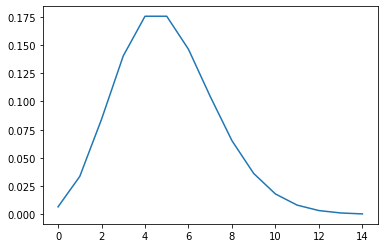

In [18]:
#pmf takes k and mu, though mu has to be a range.
plt.plot(x, stats.poisson.pmf(x,mu))
plt.show()

11. Find out

  (a) The mean and variance of the distribution
  
  (b) The probability that two customers arrive in a particular hour
  
  (c) The probability fewer than 10 arrive
  
  (d) The probability that no more than 10 arrive
  
  (e) The probability that more than 15 arrive

In [19]:
#(a) The mean and variance of the distribution
#mean and variance should all be the same
print('Mean and variance is both',5, 'due to Poisson Rules' )

Mean and variance is both 5 due to Poisson Rules


In [20]:
#stats.poisson.pmf(x, mu).mean()
#stats.poisson.pmf(x, mu).var()

In [21]:
# Evaluate the probability mass function at these locations(0,1,2....14) which make 15 values.
probs = stats.poisson.pmf(x,mu)
print(probs)

[0.00673795 0.03368973 0.08422434 0.1403739  0.17546737 0.17546737
 0.14622281 0.10444486 0.06527804 0.03626558 0.01813279 0.00824218
 0.00343424 0.00132086 0.00047174]


In [22]:
#(b) The probability that two customers arrive in a particular hour
#Rate parameter:
#5/hour = 1/12*60 = 5
#the rate parameter is 5
#Therefore:
k=2
mu=5#mu/rate parameter
#Equation for pmf
#eq = exp(-mu)*(mu**k)/k!
stats.poisson.pmf(k, mu)

0.08422433748856832

In [23]:
#(c) The probability fewer than 10 arrive
#P(X<10) = P(X<=9)
#P(X=0)+....P(X=9) 
few = 0.00673795+0.03368973+0.08422434+0.1403739+0.17546737+ 0.17546737+0.14622281+ 0.10444486+ 0.06527804+ 0.03626558
print('(c) The probability fewer than 10 arrive: ', round(few,5))

(c) The probability fewer than 10 arrive:  0.96817


In [24]:
#(d) The probability that no more than 10 arrive(less than or equal to)
#P(X<=10)
#P(X=0)+....P(X=10)
nomore = 0.9681719500000001+0.01813279
print('(d) The probability that no more than 10 arrive: ', round(nomore,5))

(d) The probability that no more than 10 arrive:  0.9863


In [38]:
#(e) The probability that more than 15 arrive
#P(X>15) = 1-P(X<=15)
# =1 - P(X=0)+.....p(X=15)
morethan = probs.sum()
morethan = 1-morethan
print('(e) The probability that more than 15 arrive ', round(morethan,5))

(e) The probability that more than 15 arrive  0.00023


## Model fitting


Using the European Birds data set from above.  
Ensuring that you rename the column `Sexual.Dimorphism` as `SexualDimorphism` - since the '.' in its name causes a problem for the ols fitting command.  Use the `rename()` command to do this.

In [26]:
#rename dataset
data = data.rename(columns={"Sexual.dimorphism":"SexualDimorphism"})
data.columns

Index(['ID', 'Order', 'Family', 'Species', 'LengthU_MEAN', 'WingU_MEAN',
       'WingM_MEAN', 'WingF_MEAN', 'TailU_MEAN', 'TailM_MEAN', 'TailF_MEAN',
       'BillU_MEAN', 'BillM_MEAN', 'BillF_MEAN', 'TarsusU_MEAN',
       'TarsusM_MEAN', 'TarsusF_MEAN', 'WeightU_MEAN', 'WeightM_MEAN',
       'WeightF_MEAN', 'SexualDimorphism', 'Clutch_MIN', 'Clutch_MAX',
       'Clutch_MEAN', 'Broods.per.year', 'EggL_MEAN', 'EggW_MEAN', 'Egg_MASS',
       'Young', 'Association.during.nesting', 'Nest.type', 'Nest.building',
       'Mating.system', 'Incubation.period', 'Incubation.sex', 'Hatching',
       'Eggshells', 'Nestling.period', 'Fledging.period', 'Parental.feeding',
       'Age.of.independence', 'Feeding.independence', 'Age.of.first.breeding',
       'Life.span', 'Post.fledging.mortality', 'Mortality.of.adults',
       'Association.outside.the.breeding.season', 'Territoriality',
       'Sedentary', 'Facultative.migrant', 'Short.distance.migrant',
       'Long.distance.migrant', 'Deciduous.forest

12. Draw a scatter plot of the log of female bill length against the log of female breeding weight.  Distinguish using a plot symbol species that are or are not sexually dimorphic (with a difference between males and females in size/colour).

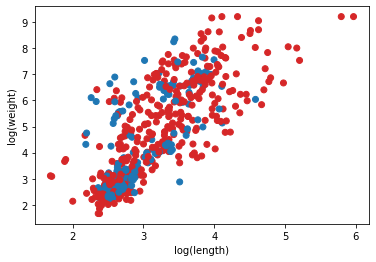

In [27]:
#Create two new columns for the logs of female bill length and female breeding weight

#Distinguish using a plot symbol species that "are" or "are not" 
#sexually dimorphic(with a difference between males and females in size/colour)

cols = np.where(data['SexualDimorphism']==1,'tab:blue','tab:red')

fig, ax = plt.subplots(1,1)
plt.scatter(np.log(data['BillF_MEAN']) , np.log(data['WeightF_MEAN']) , marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='log(weight)');

13. Fit a regression model for log female bill length as predicted by log female breeding weight.  

  (a) Print out a summary of the model fit
  
  (b) Plot the fitted curve onto the data
  
  (c) Draw a scatter plot of the residuals and comment on them

In [28]:
#(a) Print out a summary of the model fit

# log female bill length as predicted by log female breeding weight.
#weight = predictor variable, using weight to predict length, 
#also known as the independent variable  

data['logLength'] = np.log(data['BillF_MEAN'])
data['logWeight'] = np.log(data['WeightF_MEAN'])

#female bill length
x = data['logLength']
#female log weight
y = data['logWeight']

fittedmodel = smf.ols(formula="logWeight ~ logLength", data=data).fit() 
predictions = fittedmodel.predict(data)
residuals = y - predictions

fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logWeight   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     620.5
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.51e-89
Time:                        13:23:31   Log-Likelihood:                -802.50
No. Observations:                 496   AIC:                             1609.
Df Residuals:                     494   BIC:                             1617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9696      0.279     -7.068      0.000      -2.517      -1.422
logLength      2.1342      0.086     24.911      0.000       1.966       2.303
==============================================================================
Omnibus:                       30.743   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.817
Skew:                           0.565   Prob(JB):                     2.03e-07
Kurtosis:                       2.536   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

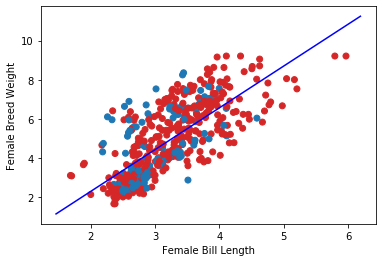

In [29]:
#(b) Plot the fitted curve onto the data
fig, ax = plt.subplots(1,1)
plt.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='Female Bill Length', ylabel='Female Breed Weight');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin, xmax]
xpmat = pd.DataFrame({'logLength':xp})
yp = fittedmodel.predict(xpmat)
plt.plot(xp, yp, 'b-');

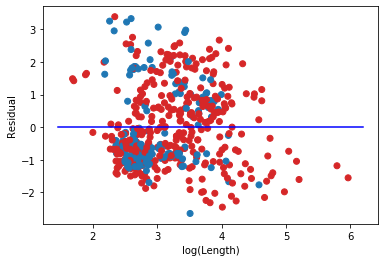

In [30]:
#(c) Draw a scatter plot of the residuals and comment on them
#x = data['logLength']
#y = residuals
fig, ax = plt.subplots(1,1)
plt.scatter( data['logLength'], residuals, marker='o', c=cols);
ax.set(xlabel='log(Length)', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
plt.plot(xp, yp, 'b-');

------------COMMENT FOR QUESTION13(C)------comment on plot of residuals----------

We have a somewhat even scatter around zero.
This is a good fit for the residuals.

14. Now add Sexual Dimorphism as a covariate, and see if that improves the model by inspecting the residual scatter plot.

In [31]:
#Question 14: add Sexual Dimorphism as a covariate
#inspecting the residual scatter plot.

#fitted and trained..
fittedmodel = smf.ols(formula="logWeight ~ logLength*C(SexualDimorphism)", data=data).fit()
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logWeight   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 13 May 2020   Prob (F-statistic):           7.31e-87
Time:                        13:23:32   Log-Likelihood:                -801.73
No. Observations:                 496   AIC:                             1611.
Df Residuals:                     492   BIC:                             1628.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8215      0.326     -5.581      0.000      -2.463      -1.180
C(SexualDimorphism)[T.1.0]              -0.7895      0.686     -1.151      0.250      -2.137       0.559
logLength                                2.0863      0.097     21.403      0.000       1.895       2.278
logLength:C(SexualDimorphism)[T.1.0]     0.2676      0.221      1.211      0.227      -0.167       0.702
==============================================================================
Omnibus:                       29.641   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.176
Skew:                           0.580   Prob(JB):                     1.70e-07
Kurtosis:                       2.598   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

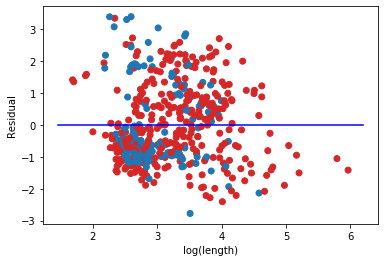

In [32]:
predictions = fittedmodel.predict(data)
residuals = data['logWeight'] - predictions

fig, ax = plt.subplots(1,1)
plt.scatter(data['logLength'], residuals, marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='Residual');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = [xmin,xmax] # store these as a vector
yp = [0, 0]
plt.plot(xp, yp, 'b-');

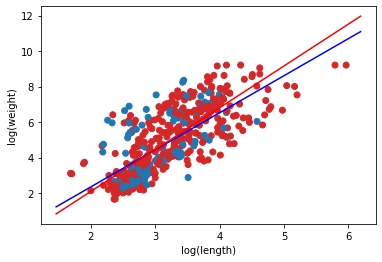

In [37]:
fig, ax = plt.subplots(1,1)
plt.scatter(x, y, marker='o', c=cols);
ax.set(xlabel='log(length)', ylabel='log(weight)');
xmin, xmax = ax.get_xbound() # get the plot bounds
xp = np.linspace(xmin, xmax, 101)
xpmat = pd.DataFrame({'logLength':xp})
xpmat['SexualDimorphism'] = 0
yp = fittedmodel.predict(xpmat)
plt.plot(xp, yp, 'b-');
xpmat['SexualDimorphism'] = 1
yp = fittedmodel.predict(xpmat)
plt.plot(xp, yp, 'r-');